In [402]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
%matplotlib inline
sns.set(color_codes = True)


In [403]:
liab2loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [404]:
liab2loan.shape

(5000, 14)

In [405]:
liab2loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###### From the above dataset, nominally every feature seems valubale except for two namely: ID & ZIP Code 

In [406]:
liab2loan.drop(columns = ['ID','ZIP Code'], axis = 1, inplace = True)

In [407]:
liab2loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [408]:
liab2loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


###### Every feature seems to be either mostly integer type, float otherwise. Only two features seems to be categorical variables which are Education and Family. Both the variables seem to be already ordinally encoded. So none of the two categorical variables need encoding.  

In [409]:
target_feat = liab2loan['Personal Loan']

In [410]:
liab2loan.drop('Personal Loan',axis = 1, inplace = True)

In [411]:
target_feat.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal Loan, dtype: int64

In [412]:
liab2loan = pd.concat([liab2loan,target_feat],axis=1)

In [413]:
liab2loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


###### Here I've just pushed the target variable to the last for easy comprehension. 

In [414]:
liab2loan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


###### The above observation has come useful in tracing out a major junk data in the 'experience' column which is its Min value of '-3'. Also the standard deviations of all columns except 'Age', 'Experience', 'Income' and 'Mortgage' seem to be acceptable. The excepted columns need more attention and overall, all the columns need inspection for dirty values such  as '-3' in experience. 

In [415]:
liab2loan.isnull().values.any()

False

###### There doesn't seem to be any empty value in any of the columns. 

### TASK 2.

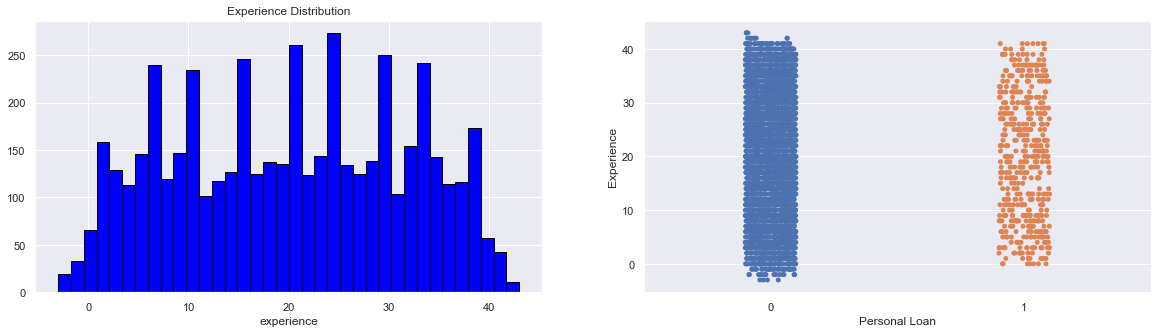

In [416]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(liab2loan['Experience'],color = 'blue', edgecolor = 'black', bins = int(180/5));
plt.title('Experience Distribution');
plt.xlabel('experience');
plt.subplot(1,2,2)
sns.stripplot(liab2loan['Personal Loan'], liab2loan['Experience'])


###### From the distribution, 'Experience' seems to have a slight right skew. People seem to avail loan(or not) from all levels of experience. 

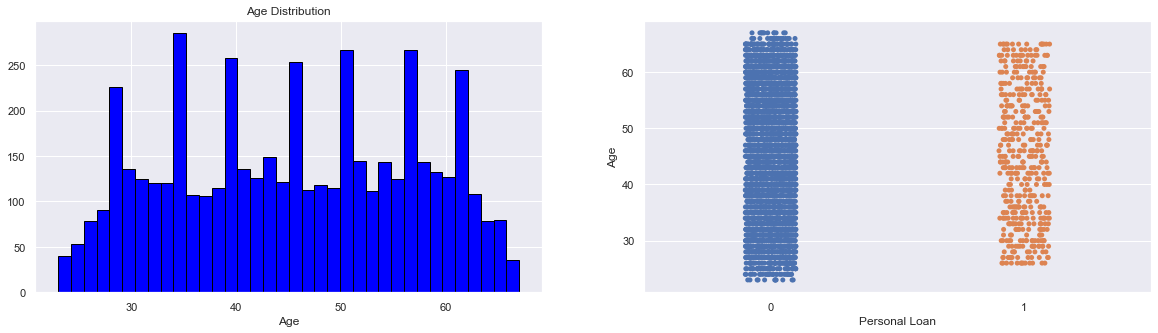

In [417]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(liab2loan['Age'],color = 'blue', edgecolor = 'black', bins = int(180/5));
plt.title('Age Distribution');
plt.xlabel('Age');
plt.subplot(1,2,2)
sns.stripplot(liab2loan['Personal Loan'], liab2loan['Age'])


###### From the distribution, 'Age' seems to have a slight left skew. From the strip plot it nearly appears as if only the people older than a certain age and younger than a certain age avail the loan. 

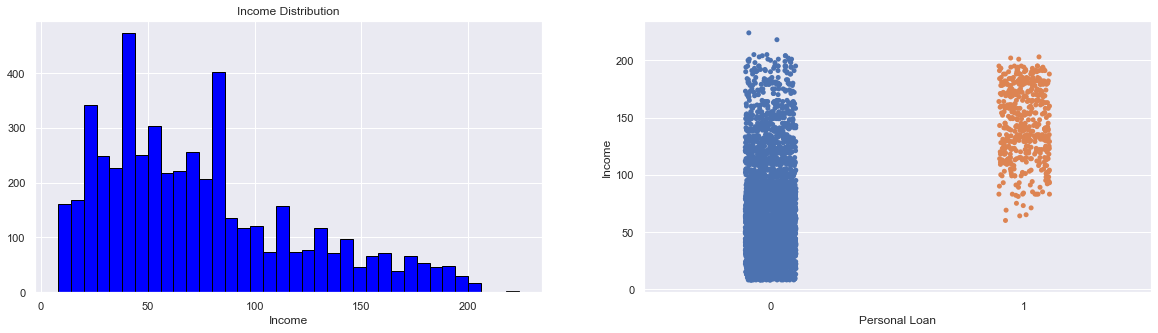

In [418]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(liab2loan['Income'],color = 'blue', edgecolor = 'black', bins = int(180/5));
plt.title('Income Distribution');
plt.xlabel('Income');
plt.subplot(1,2,2)
sns.stripplot(liab2loan['Personal Loan'], liab2loan['Income'])


###### Income's distribution has a heavy left skew. The strip plot suggests loanees only from above a certain level of income seem to avail the loan and people from all levels of income seem to not avail the loan. 

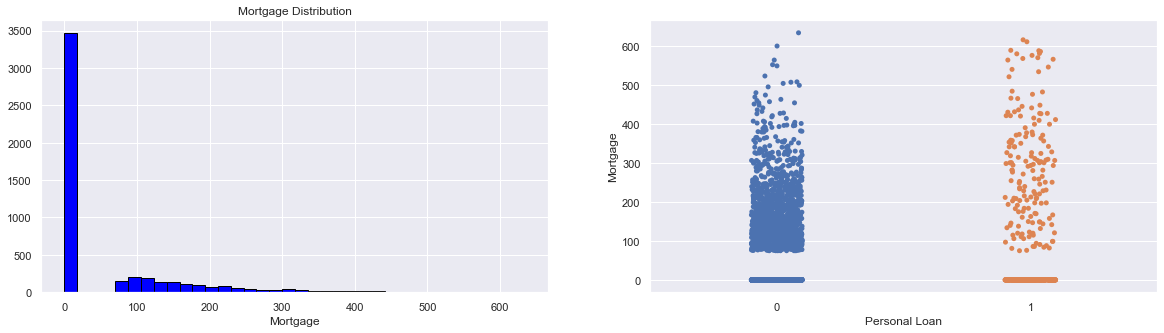

In [419]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(liab2loan['Mortgage'],color = 'blue', edgecolor = 'black', bins = int(180/5));
plt.title('Mortgage Distribution');
plt.xlabel('Mortgage');
plt.subplot(1,2,2)
sns.stripplot(liab2loan['Personal Loan'], liab2loan['Mortgage'])


###### The mortgage has a heavy left skew. House mortgage is shown to be majorly zero. Strip plot suggests that regardless of any level of house mortgage, loans are availed and also clearly that very less loans are availed than not. 

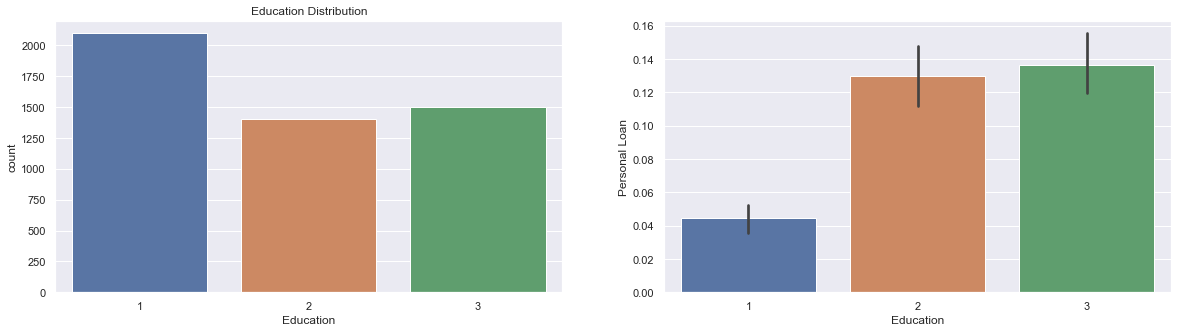

In [420]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(liab2loan['Education']);
plt.title('Education Distribution');
plt.xlabel('Education');
plt.subplot(1,2,2)
sns.barplot(liab2loan['Education'],liab2loan['Personal Loan'])


###### From the count plot, it is observed that under graduates are higher in number than graduates and professionals who seem to be equal in numbers.   From the bar plot it is evident that professionals and graduates avail loans more than undergraduates.

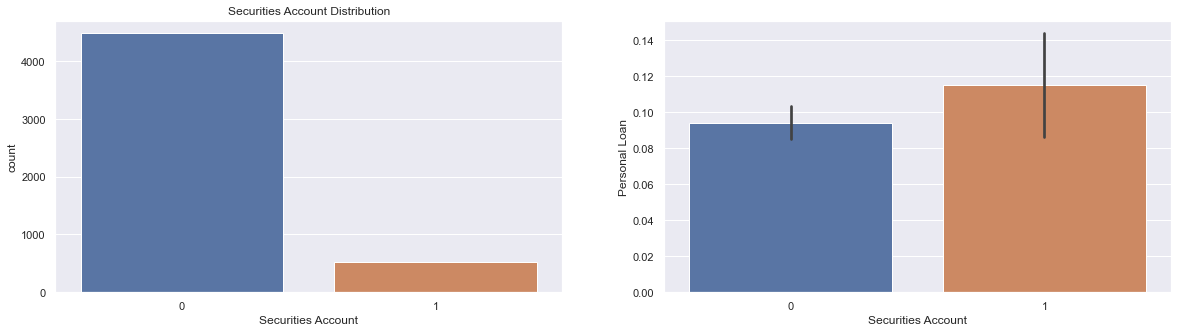

In [421]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(liab2loan['Securities Account']);
plt.title('Securities Account Distribution');
plt.xlabel('Securities Account');
plt.subplot(1,2,2)
sns.barplot(liab2loan['Securities Account'],liab2loan['Personal Loan'])


###### By the count plot, it is seen that very less people have securities account than not. From the bar plot it is seen than loan is awarded more to people with securities account than people with none. 

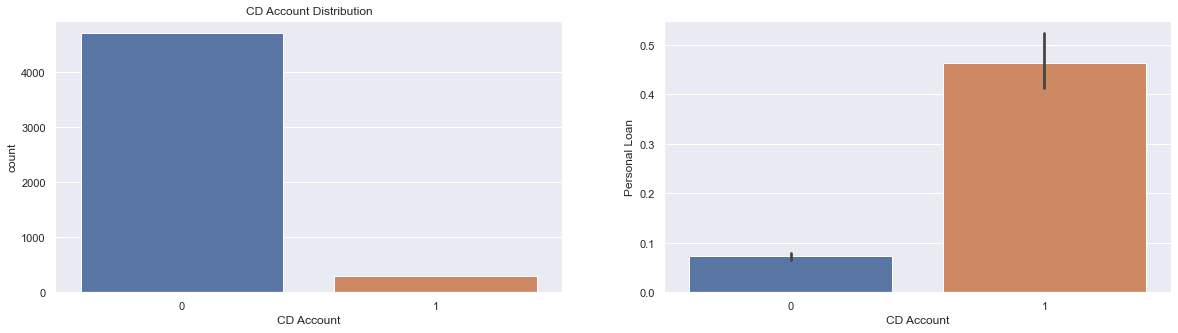

In [422]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(liab2loan['CD Account']);
plt.title('CD Account Distribution');
plt.xlabel('CD Account');
plt.subplot(1,2,2)
sns.barplot(liab2loan['CD Account'],liab2loan['Personal Loan'])


###### CD account follows the same trend as of 'Securities Account'. 

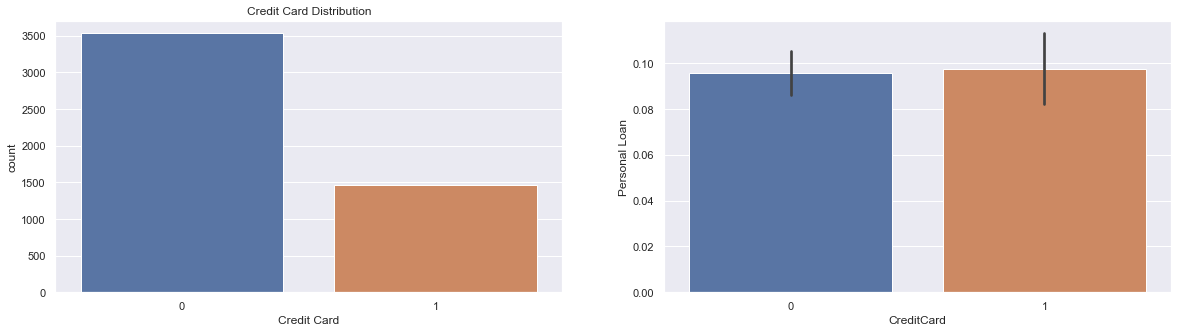

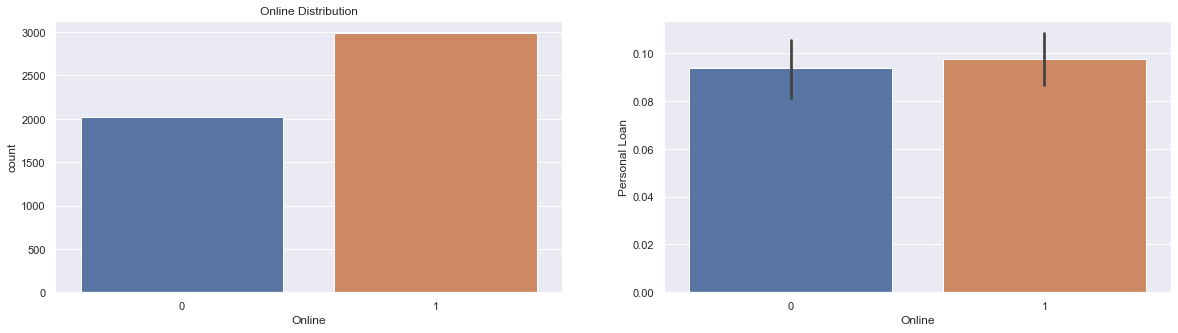

In [423]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(liab2loan['CreditCard']);
plt.title('Credit Card Distribution');
plt.xlabel('Credit Card');
plt.subplot(1,2,2)
sns.barplot(liab2loan['CreditCard'],liab2loan['Personal Loan'])

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(liab2loan['Online']);
plt.title('Online Distribution');
plt.xlabel('Online');
plt.subplot(1,2,2)
sns.barplot(liab2loan['Online'],liab2loan['Personal Loan'])



###### Credit card barely follows the same trends as 'CD Account' and 'Securities account'. Although, the barplot nearly suggests that people with a card and people with none avail loans equally. 

###### From the countplot, it is seen that more people are online than not.

### TASK 2 END 

### TASK 3.

Text(0.5, 1.0, 'Personal Loan Distribution')

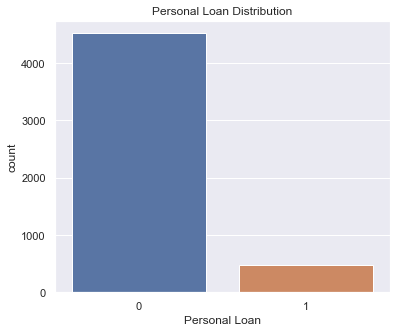

In [424]:
plt.figure(figsize=(6,5))
sns.countplot(liab2loan['Personal Loan'])
plt.title('Personal Loan Distribution')

###### Loanees are dramatically less in comparison with the non-loanees. Evidently enough the loanees by count in every aspect were lesser than non loanees. Such skewness or imbalance in the target variable can be really consequential during prediction and therefore "resampling" techniques can be taken up namely: "Oversampling", "Undersampling" or both. 

# ||-------------------------DATA PREPROCESSING - Start-------------------------------------||

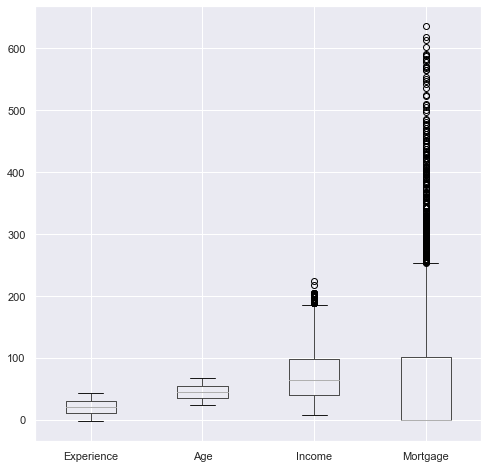

In [425]:
liab2loan.boxplot(column = ['Experience','Age','Income','Mortgage'], return_type = 'axes', figsize = (8,8)) 



###### From the above observations, the following can be inferred: There seems to be quite a density of outliers in the income and mortgage  categories which I believe calls for futher statistical analysis. Moving ahead, the experience columns remains to be pruned of any negative values and overall, the above four categories require normalization.

In [426]:
print(liab2loan.var())

Age                     131.404166
Experience              131.513962
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Securities Account        0.093519
CD Account                0.056763
Online                    0.240678
CreditCard                0.207606
Personal Loan             0.086801
dtype: float64


###### The variance of the columns 'Age','Experience','Income' and 'Mortgage' seem exceedingly high and require cleaning. 

In [427]:
liab2loan.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
Personal Loan         2.743607
dtype: float64

### REMOVING NEGATIVE VALUES FROM 'EXPERIENCE'

Outliers can be easily removed or replaced with a single line, but what to replace negatives with has to be decided. 

In [428]:
liab2loan['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

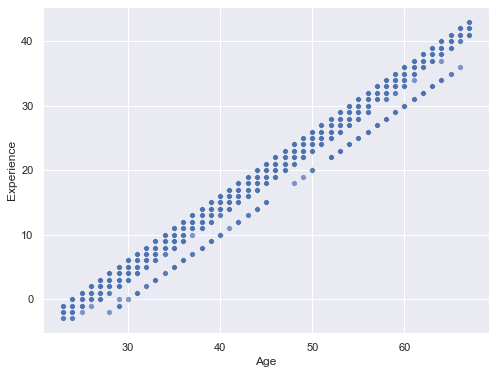

In [429]:
plt.figure(figsize=(8,6))
sns.scatterplot(liab2loan['Age'],liab2loan['Experience'],alpha=0.7)
plt.show()

###### The relationship between Age and Experience seems very linear but a lot of 'Experience' below 30 years of age seems to be negative which calls for a fix. That given, we have two options to either go by mean or mode. First let's plot distribution for experience.

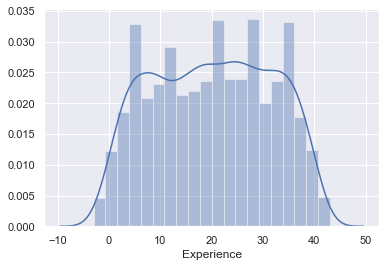

In [430]:
sns.distplot(liab2loan['Experience'])

###### From the above plot, it appears that there's no reliable mode to replace negatives with, therefore mean would be a better option since it's in summary of all the observations including the modes. 

In [431]:
liab2loan['Experience'][liab2loan['Age']<30].describe(include='all')

count    488.000000
mean       1.969262
std        1.868654
min       -3.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Experience, dtype: float64

In [432]:
target_labels = liab2loan['Experience'][liab2loan['Age']<30].mode().value_counts()
target_mode = liab2loan['Experience'][liab2loan['Age']<30].mode()



df = pd.concat([target_mode,target_labels],axis=0)

In [433]:
print(df)

0    3
3    1
dtype: int64


###### So here the counts of both the modes under the age of 30 seems unreliably low and therefore the mean would be a better replacement for negatives. 

In [434]:
liab2loan['Experience'][liab2loan['Experience']<0] = 1.969262

<ipython-input-434-dcea2c44d773>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liab2loan['Experience'][liab2loan['Experience']<0] = 1.969262


In [435]:
liab2loan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.140080,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.406153,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### OUTLIER IDENTIFICATION

###### Let's run an outlier test on the dataset and trace the columns to target: 

In [436]:
feat_desc  = liab2loan.describe()
feat_desc

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.140080,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.406153,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [437]:
outlier_list = []
for i in list(feat_desc):
    q1 = feat_desc[i]['25%']
    print(f'the q1 of {i} is {q1}')
    q3 = feat_desc[i]['75%']
    print(f'the q3 of {i} is {q3}')
    iqr =  abs(q1 - q3)
    print('.')
    print('.')
    print(f'the interquartile range of {i} is {iqr}')
    mx = feat_desc[i]['max']
    mn = feat_desc[i]['min']
    print('are there any outliers?')
    up_lim = q3 + 1.5*iqr
    dwn_lim = q1 - 1.5*iqr
    print('.')
    print('.')
    if ((mx<=up_lim) & (mn>=dwn_lim)):
        print(f'there are no outliers in {i}')
        
    else:
        print('whoop them outliers!')
        outlier_list.append(i)
    print('.')
    print('.')
    print('.')
    
    

the q1 of Age is 35.0
the q3 of Age is 55.0
.
.
the interquartile range of Age is 20.0
are there any outliers?
.
.
there are no outliers in Age
.
.
.
the q1 of Experience is 10.0
the q3 of Experience is 30.0
.
.
the interquartile range of Experience is 20.0
are there any outliers?
.
.
there are no outliers in Experience
.
.
.
the q1 of Income is 39.0
the q3 of Income is 98.0
.
.
the interquartile range of Income is 59.0
are there any outliers?
.
.
whoop them outliers!
.
.
.
the q1 of Family is 1.0
the q3 of Family is 3.0
.
.
the interquartile range of Family is 2.0
are there any outliers?
.
.
there are no outliers in Family
.
.
.
the q1 of CCAvg is 0.7
the q3 of CCAvg is 2.5
.
.
the interquartile range of CCAvg is 1.8
are there any outliers?
.
.
whoop them outliers!
.
.
.
the q1 of Education is 1.0
the q3 of Education is 3.0
.
.
the interquartile range of Education is 2.0
are there any outliers?
.
.
there are no outliers in Education
.
.
.
the q1 of Mortgage is 0.0
the q3 of Mortgage i

###### Above is a routine which identifies columns from a dataset with outliers and collects them in a separate list. 

In [438]:
feat_desc[outlier_list]

,Income,CCAvg,Mortgage,Securities Account,CD Account,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,73.774200,1.937938,56.498800,0.104400,0.06040,0.096000
std,46.033729,1.747659,101.713802,0.305809,0.23825,0.294621
min,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,39.000000,0.700000,0.000000,0.000000,0.00000,0.000000
50%,64.000000,1.500000,0.000000,0.000000,0.00000,0.000000
75%,98.000000,2.500000,101.000000,0.000000,0.00000,0.000000
max,224.000000,10.000000,635.000000,1.000000,1.00000,1.000000


###### In the above generated data residue from the 'Outlier filteration', the only actionably valid columns Income, Mortgage and CCAvg, since all other columns seem to be normalized with z-score. 


In [439]:
outlier_list = outlier_list[0:3]

In [440]:
outlier_list

['Income', 'CCAvg', 'Mortgage']

Text(0.5, 0, 'CCAvg Dist')

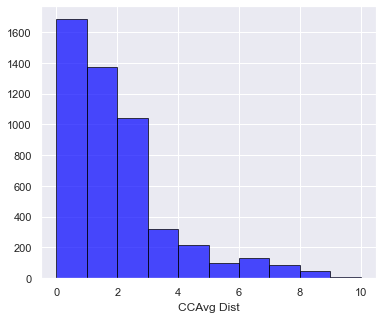

In [441]:
plt.figure(figsize = (6,5))
plt.hist(liab2loan['CCAvg'],color='blue',edgecolor='black',alpha = 0.7)
plt.xlabel('CCAvg Dist')

###### CCAvg evidently has a daunting left skew. 

## OUTLIER REMOVAL

In [442]:
def remove_outliers(i):
    outliers=[]   #a fresh outlier list to accomodate outliers for each category column which later add to a df
    print('')
    print(f'Calculated outliers for {i}:')
    print('')
    q1 = feat_desc[i]['25%']
    q3 = feat_desc[i]['75%']
    iqr =  abs(q1 - q3)
    mx = feat_desc[i]['max']
    mn = feat_desc[i]['min']
    up_lim = q3 + 1.5*iqr
    dwn_lim = q1 - 1.5*iqr
    filterate = liab2loan[i][~((liab2loan[i]<dwn_lim)|(liab2loan[i]>up_lim))] #wipes outlier values to NaN values which will 
                                                                              #be treated later. 
    
        
    return filterate

###### Above is a function, which collects outliers for any column, filters them out and returns the column

In [443]:
filterate = remove_outliers('Income')


Calculated outliers for Income:



Text(0.5, 0, 'Income w/o outliers')

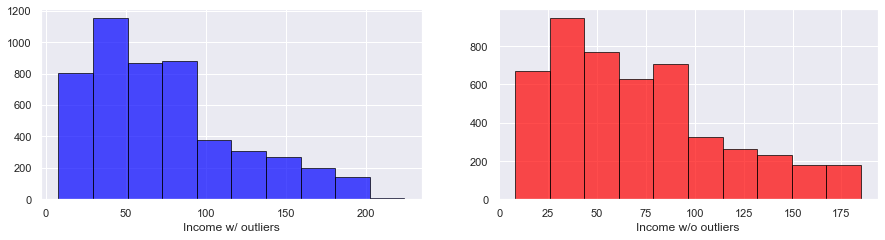

In [444]:
plt.figure(figsize=(15,3.5))
plt.subplot(1,2,1)
plt.hist(liab2loan['Income'],color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income w/ outliers')
plt.subplot(1,2,2)
plt.hist(filterate, color = 'red', edgecolor = 'black',alpha = 0.7)
plt.xlabel('Income w/o outliers')


###### As observed above, the lower and upper outliers seem to be removed generating null space in the column which will be filled later. 

In [445]:
liab2loan['Income'] = filterate #income columns is replaced with refined data

In [446]:
outlier_list

['Income', 'CCAvg', 'Mortgage']

In [447]:
filterate = remove_outliers('CCAvg')


Calculated outliers for CCAvg:



Text(0.5, 0, 'CCAvg w/o outliers')

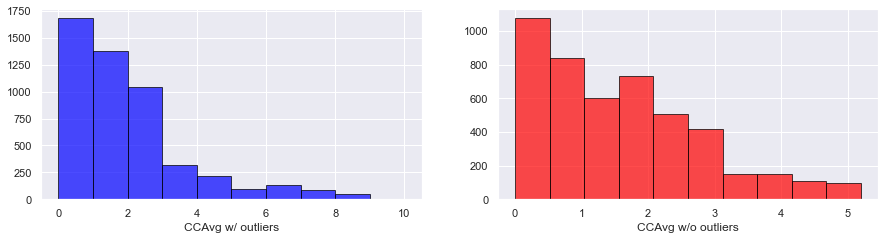

In [448]:
plt.figure(figsize = (15,3.5))
plt.subplot(1,2,1)
plt.hist(liab2loan['CCAvg'], color = 'blue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg w/ outliers')
plt.subplot(1,2,2)
plt.hist(filterate,color = 'red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg w/o outliers')

In [449]:
liab2loan['CCAvg'] = filterate

In [450]:
outlier_list

['Income', 'CCAvg', 'Mortgage']

In [451]:
filterate = remove_outliers('Mortgage')


Calculated outliers for Mortgage:



Text(0.5, 0, 'CCAVG w/o outliers')

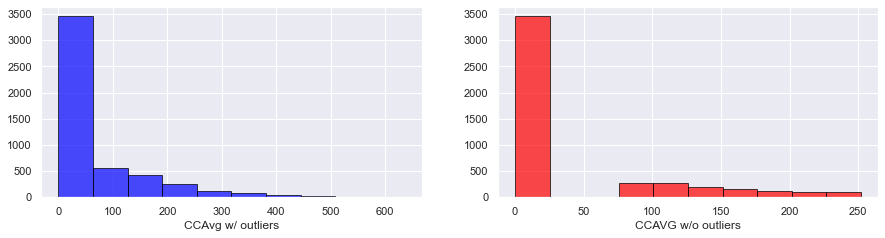

In [452]:
plt.figure(figsize=(15,3.5))
plt.subplot(1,2,1)
plt.hist(liab2loan['Mortgage'],color = 'blue',edgecolor='black',alpha=0.7)
plt.xlabel('CCAvg w/ outliers')
plt.subplot(1,2,2)
plt.hist(filterate,color='red',edgecolor='black',alpha=0.7)
plt.xlabel('CCAVG w/o outliers')

In [453]:
liab2loan['Mortgage'] = filterate

In [454]:
liab2loan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,4904.000000,5000.000000,4676.000000,5000.000000,4709.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.140080,71.407626,2.396400,1.597923,1.881000,38.011467,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.406153,43.221791,1.147663,1.189172,0.839869,68.100514,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,38.000000,1.000000,0.600000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,63.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,94.000000,3.000000,2.300000,3.000000,81.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,185.000000,4.000000,5.200000,3.000000,252.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Securities Account distribution')

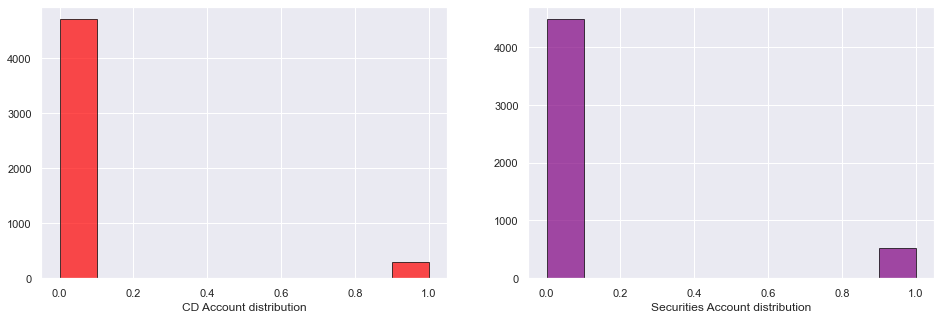

In [455]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.hist(liab2loan['CD Account'], color = 'red',edgecolor = 'black',alpha = 0.7)
plt.xlabel('CD Account distribution')
plt.subplot(1,2,2)
plt.hist(liab2loan['Securities Account'], color = 'purple',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Securities Account distribution')

###### Applying outlier removal even once could remove a whole category in these two columns. Therefore, probably some type of data skewness fixing technique could be employed here. 

### REMOVING MISSING VAUES

In [456]:
liab2loan.isna().any()

Age                   False
Experience            False
Income                 True
Family                False
CCAvg                  True
Education             False
Mortgage               True
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

###### A few features seem to have missing values since outlier removal. 

In [457]:
inc_missing = pd.DataFrame(liab2loan.Income.isnull())
liab2loan[inc_missing['Income'] == True]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
18,46,21.0,NaN,2,NaN,3,0.0,0,0,0,0,1
47,37,12.0,NaN,4,0.2,3,211.0,1,1,1,1,1
53,50,26.0,NaN,3,2.1,3,240.0,0,0,1,0,1
59,31,5.0,NaN,2,4.5,1,NaN,0,0,0,0,0
303,49,25.0,NaN,4,3.0,1,NaN,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4659,28,4.0,NaN,1,NaN,1,0.0,0,0,0,0,0
4670,52,26.0,NaN,1,1.7,1,0.0,0,0,1,0,0
4895,45,20.0,NaN,2,2.8,1,0.0,0,0,1,1,0
4981,34,9.0,NaN,2,3.0,1,122.0,0,0,1,0,0


In [458]:
mort_missing = pd.DataFrame(liab2loan.Mortgage.isna())
liab2loan[mort_missing['Mortgage'] == True]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
22,29,5.0,62.0,1,1.2,1,NaN,0,0,1,0,0
39,38,13.0,80.0,4,0.7,3,NaN,0,0,1,0,0
42,32,7.0,132.0,4,1.1,2,NaN,0,0,1,0,1
59,31,5.0,NaN,2,4.5,1,NaN,0,0,0,0,0
66,62,36.0,105.0,2,2.8,1,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4859,34,8.0,165.0,1,NaN,3,NaN,0,0,0,0,1
4865,50,24.0,133.0,4,1.4,2,NaN,0,0,0,1,1
4899,54,29.0,85.0,4,1.3,3,NaN,0,0,1,0,0
4942,52,26.0,109.0,1,2.4,1,NaN,0,1,1,1,0


In [459]:
ccavg_missing = pd.DataFrame(liab2loan.CCAvg.isna())
liab2loan[ccavg_missing['CCAvg'] == True]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
9,34,9.0,180.0,1,NaN,3,0.0,0,0,0,0,1
18,46,21.0,NaN,2,NaN,3,0.0,0,0,0,0,1
44,46,20.0,104.0,1,NaN,1,0.0,0,0,1,1,0
55,41,17.0,139.0,2,NaN,1,0.0,0,0,1,0,0
61,47,21.0,125.0,1,NaN,1,112.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4908,40,16.0,138.0,2,NaN,1,0.0,0,0,1,0,0
4911,46,22.0,153.0,2,NaN,1,0.0,0,0,0,0,0
4937,33,8.0,162.0,1,NaN,1,0.0,0,1,1,1,0
4980,29,5.0,135.0,3,NaN,1,0.0,0,1,1,1,1


###### In the three tables above, the specific rows containing null/missing values respectively for each of three features can be observed. 

In [460]:
print(inc_missing.shape)
print(mort_missing.shape)
print(ccavg_missing.shape)

(5000, 1)
(5000, 1)
(5000, 1)


In [461]:
median_filler = lambda x:x.fillna(x.median())
liab2loan = liab2loan.apply(median_filler, axis =0)



###### Above is a routine run to replace NaN values with median in the respective columns. 

In [462]:
liab2loan.isna().any()

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

###### Therefore, all the missing values have been filled with median. 

## Handling categorical data

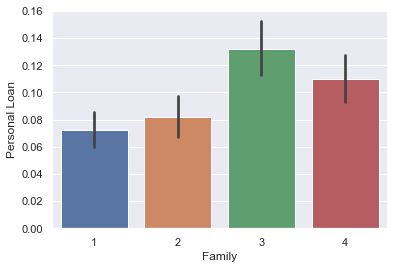

In [463]:
sns.barplot(liab2loan['Family'],liab2loan['Personal Loan'])

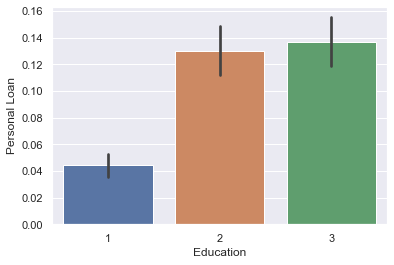

In [464]:
sns.barplot(liab2loan['Education'],liab2loan['Personal Loan'])

In [465]:
liab2loan['Family'] = liab2loan['Family'].astype(str)

In [466]:
liab2loan['Family'].dtype

dtype('O')

In [467]:
liab2loan['Education'] = liab2loan['Education'].astype(str)

In [468]:
liab2loan['Education'].dtype

dtype('O')

In [469]:
liab2loan.dtypes

Age                     int64
Experience            float64
Income                float64
Family                 object
CCAvg                 float64
Education              object
Mortgage              float64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [470]:
ordinal_encoder= OrdinalEncoder()

In [471]:
ordinal_cat = ordinal_encoder.fit_transform(liab2loan[['Education','Family']])

In [472]:
liab2loan[['Education','Family']] = ordinal_cat

In [473]:
liab2loan.dtypes

Age                     int64
Experience            float64
Income                float64
Family                float64
CCAvg                 float64
Education             float64
Mortgage              float64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

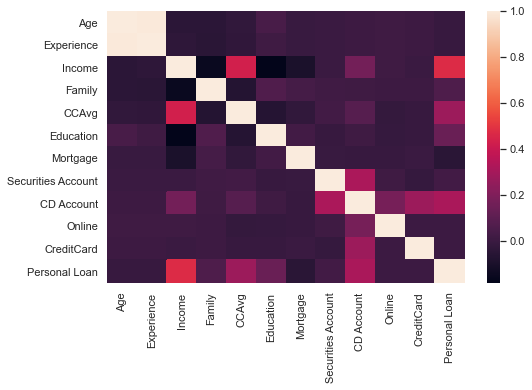

In [474]:
plt.figure(figsize=(8,5))
ht_mp = liab2loan.corr()
sns.heatmap(ht_mp)

###### In the above heatmap, Personal Loan feature seems to correlate the most with Income. 

# ||-------------------------DATA PREPROCESSING - END-------------------------------------||

### TASK 4.

In [475]:
liab2loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49.0,3.0,1.6,0.0,0.0,1,0,0,0,0
1,45,19.0,34.0,2.0,1.5,0.0,0.0,1,0,0,0,0
2,39,15.0,11.0,0.0,1.0,0.0,0.0,0,0,0,0,0
3,35,9.0,100.0,0.0,2.7,1.0,0.0,0,0,0,0,0
4,35,8.0,45.0,3.0,1.0,1.0,0.0,0,0,0,1,0


In [476]:
X = liab2loan.drop('Personal Loan',axis=1)
y = liab2loan['Personal Loan']

In [477]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49.0,3.0,1.6,0.0,0.0,1,0,0,0
1,45,19.0,34.0,2.0,1.5,0.0,0.0,1,0,0,0
2,39,15.0,11.0,0.0,1.0,0.0,0.0,0,0,0,0
3,35,9.0,100.0,0.0,2.7,1.0,0.0,0,0,0,0
4,35,8.0,45.0,3.0,1.0,1.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40.0,0.0,1.9,2.0,0.0,0,0,1,0
4996,30,4.0,15.0,3.0,0.4,0.0,85.0,0,0,1,0
4997,63,39.0,24.0,1.0,0.3,2.0,0.0,0,0,0,0
4998,65,40.0,49.0,2.0,0.5,1.0,0.0,0,0,1,0


In [478]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [479]:
X_scaled = X.apply(zscore)

In [480]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=40)

In [481]:
x_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1366,1.279146,1.215248,-0.893268,-0.345432,-1.122987,-1.049078,0.977837,-0.341423,-0.25354,0.821951,-0.645314
3452,1.366391,1.478290,-1.126826,0.525991,-1.036040,0.141703,-0.536892,-0.341423,-0.25354,-1.216618,-0.645314
2252,1.104657,1.039887,-0.706422,0.525991,-0.166571,-1.049078,-0.536892,-0.341423,-0.25354,0.821951,-0.645314
2758,1.453636,1.390610,-0.846557,-0.345432,-0.775199,1.332484,-0.536892,2.928915,-0.25354,-1.216618,1.549632
2436,0.668434,0.776844,-0.753134,0.525991,-0.079624,-1.049078,-0.536892,-0.341423,-0.25354,0.821951,-0.645314
...,...,...,...,...,...,...,...,...,...,...,...
3603,0.493944,0.426121,-0.612999,1.397414,-1.296881,-1.049078,-0.536892,-0.341423,-0.25354,0.821951,1.549632
4722,-0.465747,-0.363005,-0.192596,-1.216855,-0.079624,1.332484,-0.536892,-0.341423,-0.25354,-1.216618,-0.645314
3340,-1.425438,-1.502855,-0.402798,1.397414,0.181216,1.332484,-0.536892,-0.341423,-0.25354,-1.216618,-0.645314
3064,1.191902,1.127567,0.274519,0.525991,2.441836,-1.049078,-0.536892,-0.341423,-0.25354,0.821951,-0.645314


In [482]:
y_train

1366    0
3452    0
2252    0
2758    0
2436    0
       ..
3603    0
4722    0
3340    0
3064    0
3398    0
Name: Personal Loan, Length: 3500, dtype: int64

In [483]:
loanees = liab2loan.loc[liab2loan['Personal Loan']==1]
nolonees = liab2loan.loc[liab2loan['Personal Loan']==0]

In [484]:
print(f'loanees number : {len(loanees)}, percentage: {round(len(loanees)/len(y),3)}')
print(f'nonlonees number : {len(nolonees)}, percentage: {round(len(nolonees)/len(y),3)}')

loanees number : 480, percentage: 0.096
nonlonees number : 4520, percentage: 0.904


In [485]:
print(f'train loanees number :{len(y_train[y_train == 1])}, percentage : {round(len(y_train[y_train == 1])/len(y),4)}')
print(f'train non loanees number :{len(y_train[y_train == 0])}, percentage : {round(len(y_train[y_train == 0])/len(y),4)}')

train loanees number :343, percentage : 0.0686
train non loanees number :3157, percentage : 0.6314


In [486]:
print(f'test loanees number :{len(y_test[y_test == 1])}, percentage : {round(len(y_test[y_test == 1])/len(y),4)}')
print(f'test non loanees number :{len(y_test[y_test == 0])}, percentage : {round(len(y_test[y_test == 0])/len(y),4)}')

test loanees number :137, percentage : 0.0274
test non loanees number :1363, percentage : 0.2726


### TASK 5 and TASK 6 ( confusion matrix printing done simultaneously)

### PREDICTION USING : LOGISTIC, KNN & NAIVE BAYES

In [487]:
x_train.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,0.000115,-0.001662,0.007896,0.022557,-0.000806,0.000510,-0.003403,-0.009718,-0.012473,-0.000466,0.001254
std,1.001143,1.001970,1.009462,0.998713,1.000837,1.002865,0.991865,0.987441,0.976772,1.000235,1.000709
min,-1.948906,-1.765897,-1.477162,-1.216855,-1.383828,-1.049078,-0.536892,-0.341423,-0.253540,-1.216618,-0.645314
25%,-0.901970,-0.889090,-0.753134,-1.216855,-0.775199,-1.049078,-0.536892,-0.341423,-0.253540,-1.216618,-0.645314
50%,-0.029524,-0.012282,-0.192596,-0.345432,-0.079624,0.141703,-0.536892,-0.341423,-0.253540,0.821951,-0.645314
75%,0.842923,0.864525,0.508076,1.397414,0.529004,1.332484,-0.536892,-0.341423,-0.253540,0.821951,1.549632
max,1.889859,2.004375,2.656804,1.397414,3.137411,1.332484,3.242431,2.928915,3.944146,0.821951,1.549632


### LOGISTIC REGRESSION 

In [488]:
model = LogisticRegression(solver="liblinear")

In [489]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [490]:
mod_score = model.score(x_test,y_test)
print(mod_score)

0.9526666666666667


###### TASK 6

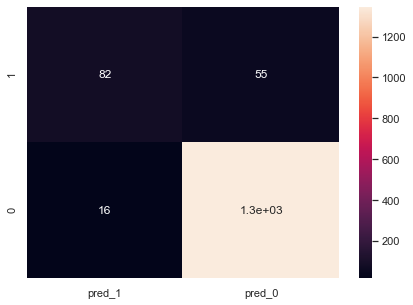

In [491]:
cm_log = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])

df_cmlog = pd.DataFrame(cm_log, index = [i for i in['1','0']],columns = [i for i in ['pred_1','pred_0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmlog, annot = True)

In [492]:
log_report = metrics.classification_report(y_test,y_pred,labels=[1,0])
print(metrics.classification_report(y_test,y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.84      0.60      0.70       137
           0       0.96      0.99      0.97      1363

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



### NAIVE BAYES 

In [493]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB()

#### Performance in training set: 

In [494]:
train_pred = nb_model.predict(x_train)

print(f'train accuracy: {round(metrics.accuracy_score(y_train,train_pred),4)}')

train accuracy: 0.9057


#### Performance in the test set: 


In [495]:
y_pred = nb_model.predict(x_test)
print(f'test accuracy: {round(metrics.accuracy_score(y_test,y_pred),4)}')

test accuracy: 0.9067


###### TASK 6

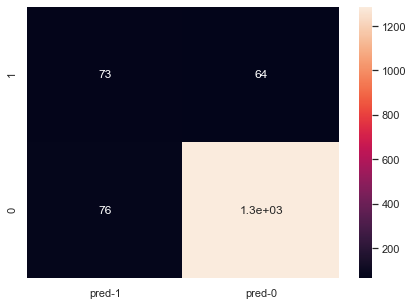

In [496]:
cm_nb = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cmnb = pd.DataFrame(cm_nb, index = [i for i in ['1','0']], columns = [i for i in ['pred-1','pred-0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cmnb, annot = True)

In [497]:
nb_report = metrics.classification_report(y_test,y_pred,labels=[1,0])
print(metrics.classification_report(y_test,y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.49      0.53      0.51       137
           0       0.95      0.94      0.95      1363

    accuracy                           0.91      1500
   macro avg       0.72      0.74      0.73      1500
weighted avg       0.91      0.91      0.91      1500



### KNN 

In [498]:
knn_mod = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
knn_mod.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [499]:
y_pred = knn_mod.predict(x_test)

knn_mod.score(x_test,y_test)

0.96

###### TASK 6 

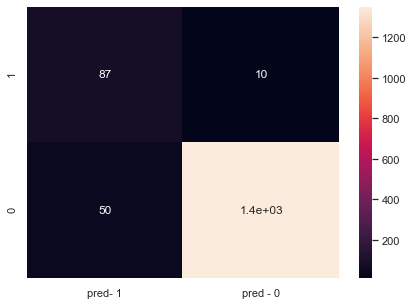

In [500]:
cm_knn_mod = metrics.confusion_matrix(y_pred,y_test,labels=[1,0])
df_cmknn = pd.DataFrame(cm_knn_mod, index = [i for i in ['1','0']], columns = [ i for i in ['pred- 1','pred - 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cmknn, annot=True)

In [501]:
knn_report = metrics.classification_report(y_test,y_pred,labels=[1,0])
print(metrics.classification_report(y_test,y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.90      0.64      0.74       137
           0       0.96      0.99      0.98      1363

    accuracy                           0.96      1500
   macro avg       0.93      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500



###### An important inference to make from the confusion matrix heatmaps of the three models is that, the KNN model has commited the least "false negative" misclassifications proving higher accuracy among the models.  

### TASK 7

In [502]:
print('logistic reg report')
print('')
print(log_report)
print('')
print('naive bayes report')
print('')
print(nb_report)
print('')
print('knn report')
print('')
print(knn_report)

logistic reg report

              precision    recall  f1-score   support

           1       0.84      0.60      0.70       137
           0       0.96      0.99      0.97      1363

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500


naive bayes report

              precision    recall  f1-score   support

           1       0.49      0.53      0.51       137
           0       0.95      0.94      0.95      1363

    accuracy                           0.91      1500
   macro avg       0.72      0.74      0.73      1500
weighted avg       0.91      0.91      0.91      1500


knn report

              precision    recall  f1-score   support

           1       0.90      0.64      0.74       137
           0       0.96      0.99      0.98      1363

    accuracy                           0.96      1500
   macro avg       0.93      0.81      0.86      1500
weighted avg       

###### Precision is the measure of the number of correct positive identifications or [True Positives] from all the samples idenitfied as POSITIVE.

###### Recall is the measure of the correct positives identifications from the all the samples which are actually POSITIVE. 

###### Therefore, of Precision and Recall, the latter would be a better measure of the model's correctness as: MORE  of 'Recall'/'Sensitivity' means less of false negatives.

###### Less of False Negatives is very essential for the model's correctness as it would be a substantial loss to ignore a candidate who is very much a Potential Loanee.

###### In this light, K NEAREST NEIGHBORS should be the most accurate or efficient model since, it's recall for '1' / 'One' is higher than the other two models. 

### WHY KNN WORKS BETTER THAN LOGISTIC REGRESSION AND NAIVE BAYES: 

###### LOGISTIC REGRESSION VS KNN:

###### KNN: 

Recognizes the "majority class" of all the samples at a selected distance from the target sample and on that basis determines the class. 

###### LOGISTIC REGRESSION: 

Takes into account the various parameter values of the target sample and calculates a value to categorize based on the threshold. Only the latter is the more iterated step.

##### Bulk of the calculation in KNN is only done post training which is 'distance based' classification as opposed to logistic regression where the same is rather during training. This creates a tradeoff between the two models: 

###### IMPLEMENTATION: 

In the context of classification, the calculation is relatively very much simpler (although post training). Where (1) distances of all the surrounding points are calculated (2) the classes of only the points at a select distance are considered and (3) based on the majority class the target sample's class is determined. 

Therefore, the algorithm as taught is 

1) immune to outliers. 
2) fairly easily implemented. 
3) Has no underlying assumption. 

###### And so for the aforesaid reasons and the by the implied logic, KNN fares better at classification. 

###### EFFICIENCY: 

Although, without time constraints KNN is a better deal, with time constraints (such as in 'real-time'), it's not the case. As already mentioned, the bulk of the calculations already happens during training (ignoring the occassional model update and maintenance) and therefore during the model execution, it's just a simple function of substitution. Therefore, in real-time, Logistic Regression is a better deal. 

### NAIVES BAYES VS THE OTHER TWO: 

##### Why Naive Bayes does not catch up to LR  and KNN: 

The reason is simply that it's Naive; it assumes there'd be zero collinearity or zero correlation betw the features. If we plotted a pair-plot or/and a correlation chart among the features, we identify a correlation on some level betw any two features. 

###### That is exactly why NB would perform much less than the LR and KNN. 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 648x648 with 0 Axes>

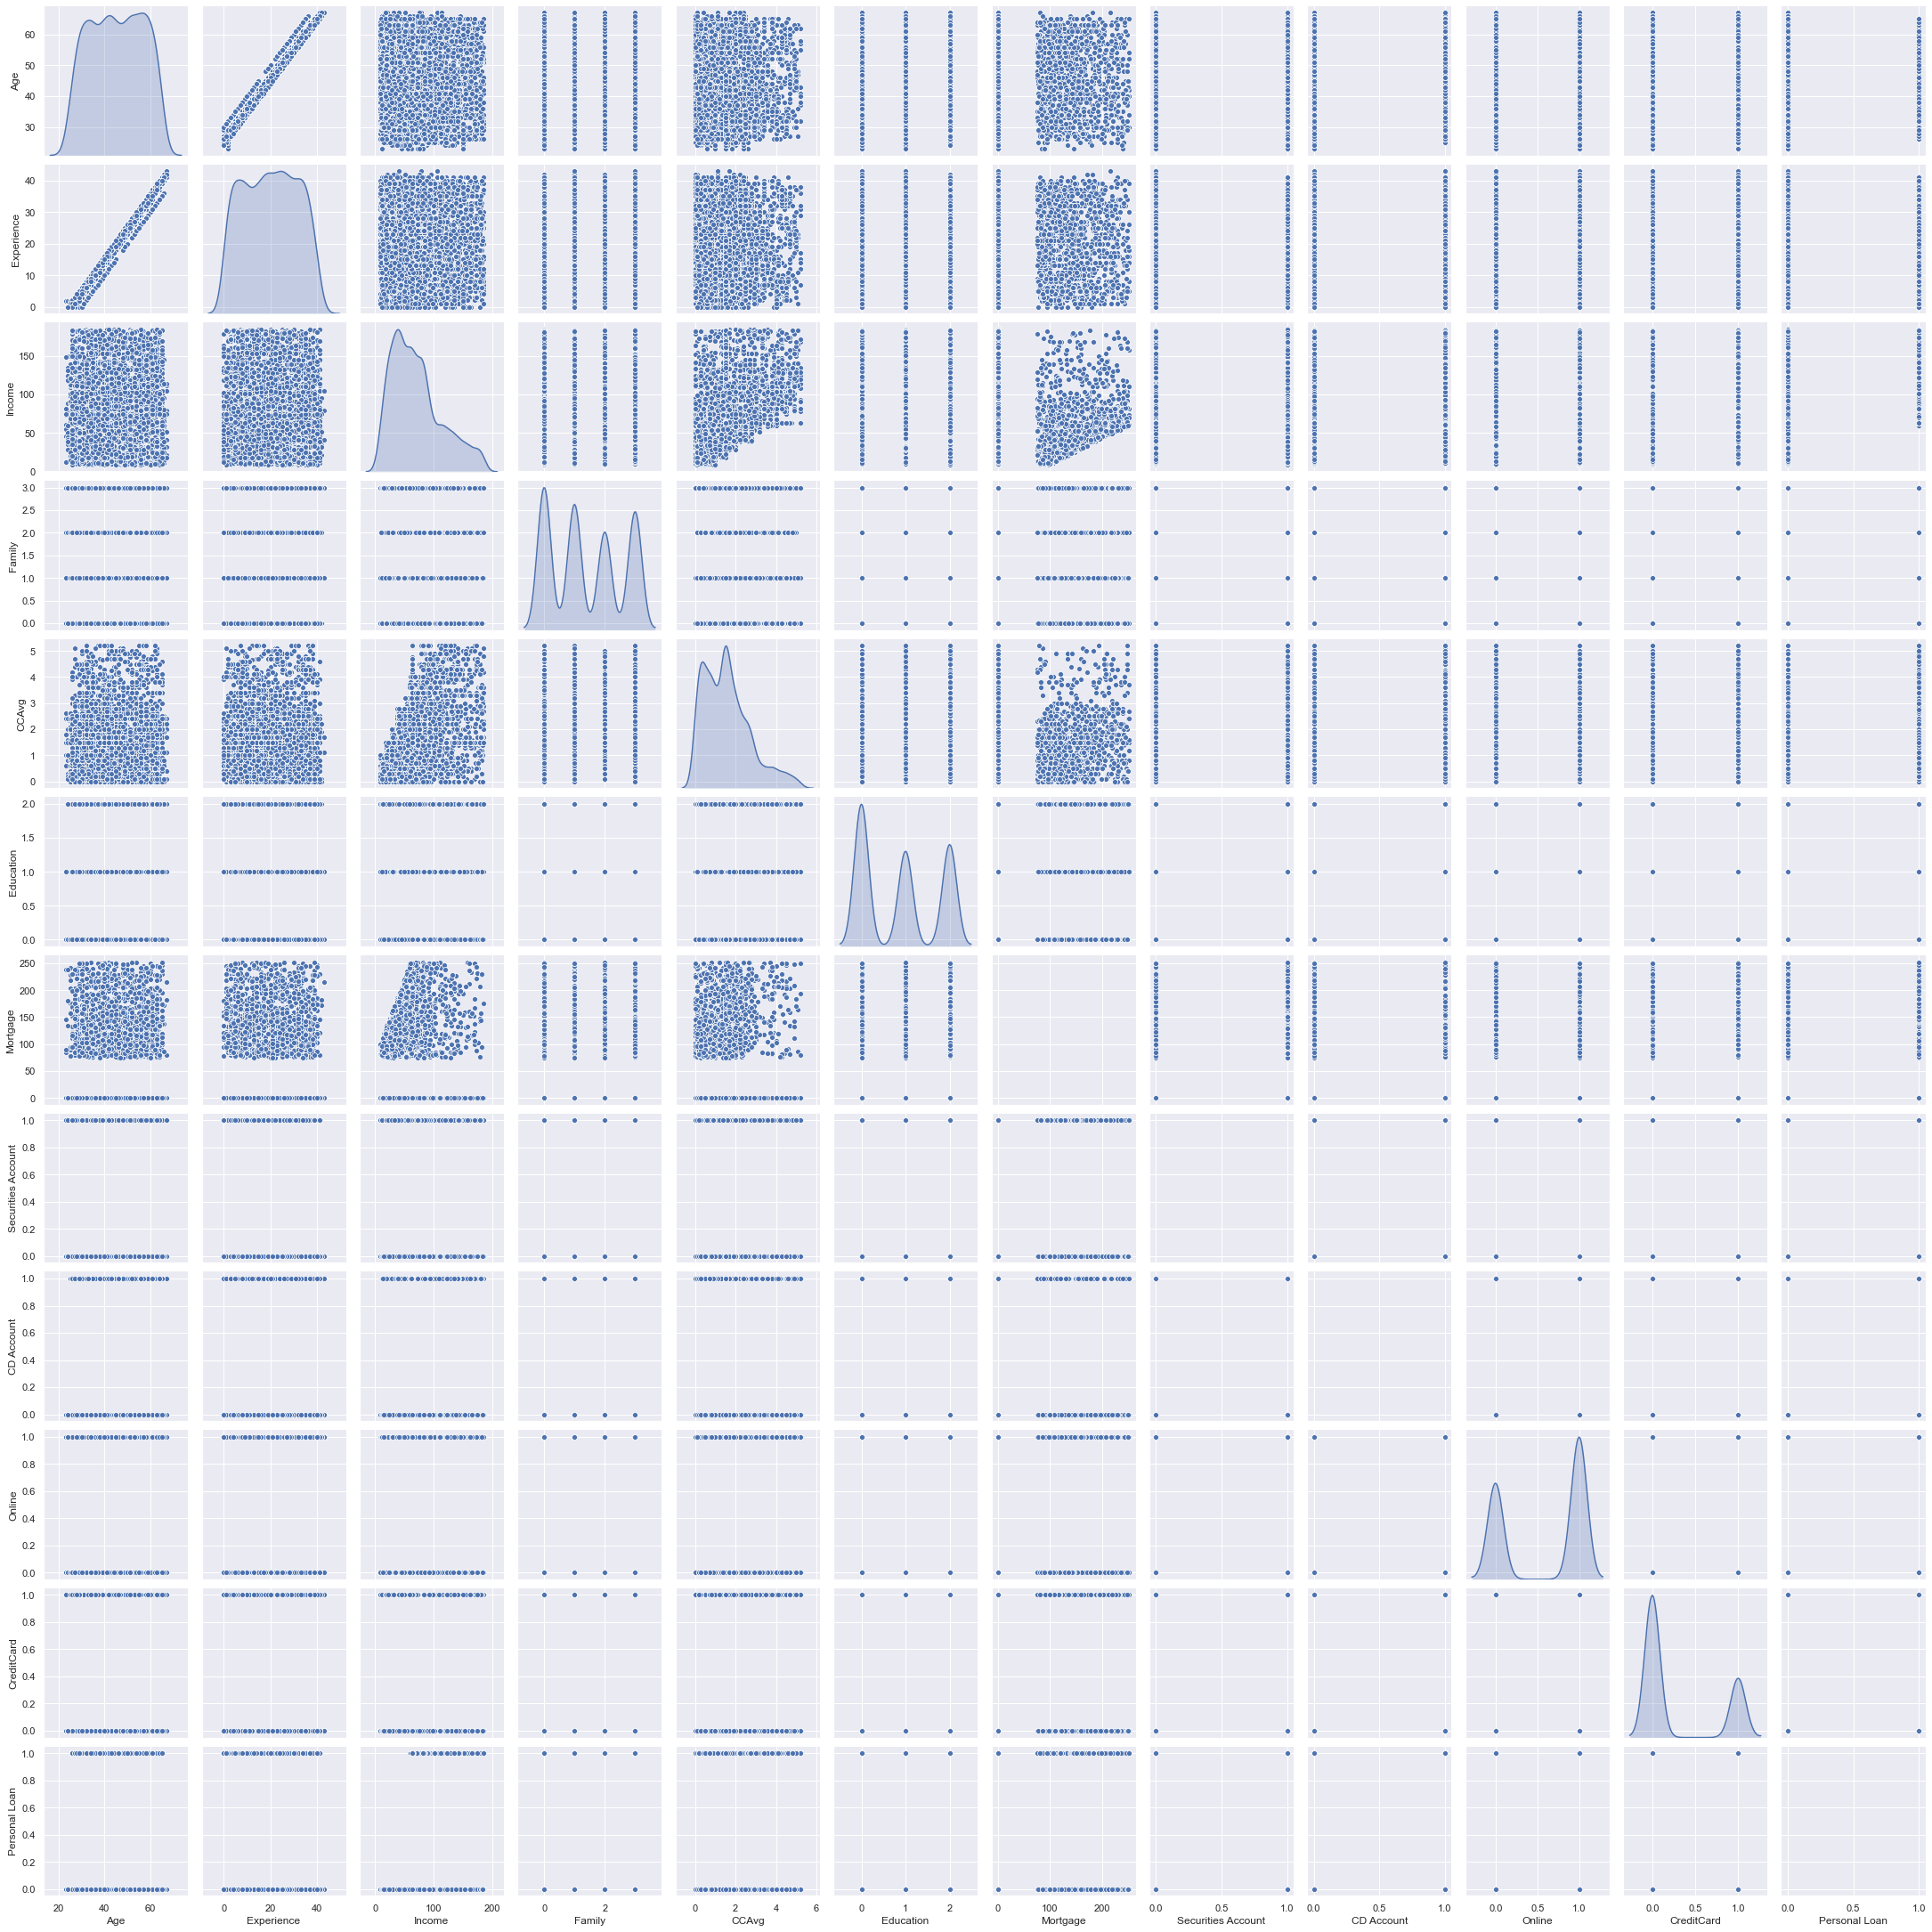

In [503]:
plt.figure(figsize=(9,9))
sns.pairplot(liab2loan, diag_kind = 'kde')

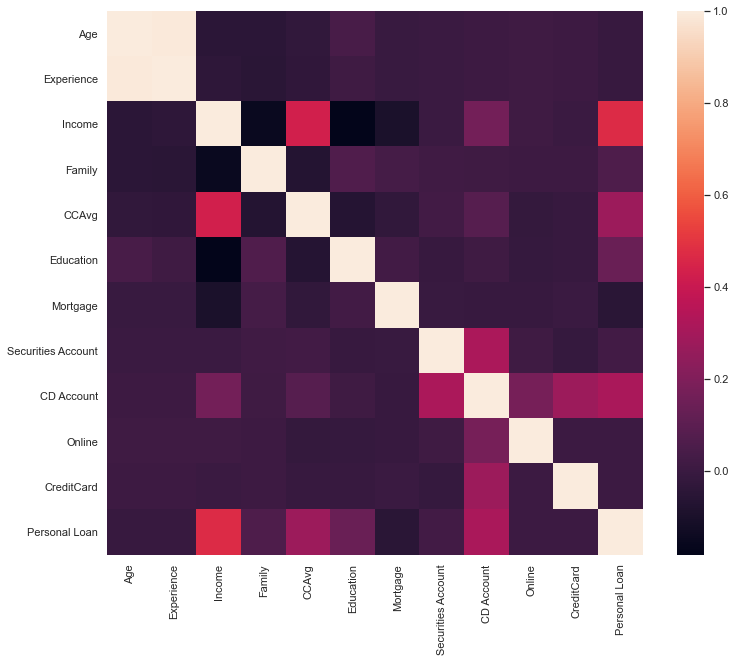

In [504]:
plt.figure(figsize=(12,10))
sns.heatmap(liab2loan.corr())

As we can observe in the pairplot, there's a clear linear kind of correlation betw Age and Experience. 

and from the correlation heatmap, it's clear that Income and Credit card average are correlated and color-wise many tiles suggest correlation betw many feature pairs on various levels. 

###### Therefore when it comes to classification, Naive Bayes shouldn't be in the first options. 

Therefore, the best model for classification for the given dataset can be determined differently in two aspects: 

###### by accuracy: 

KNN 

###### by efficiency: 

LOGISTIC REGRESSION 

